# Figure6 Panel4

Peak calling tuning improvement from defaults to tuned ZINBRA.

In [191]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.display import display
import pandas as pd

peak_calling_summary='/mnt/stripe/bio/experiments/figures/Peak Calling Summary - aging.tsv'
df = pd.read_csv(peak_calling_summary, sep='\t')
df = df.loc[df['Status'] != 'Failed']
df = df[['donor', 'modification', 'tool', 'peaks', 'procedure', 'file']]
# display(df.head(1))

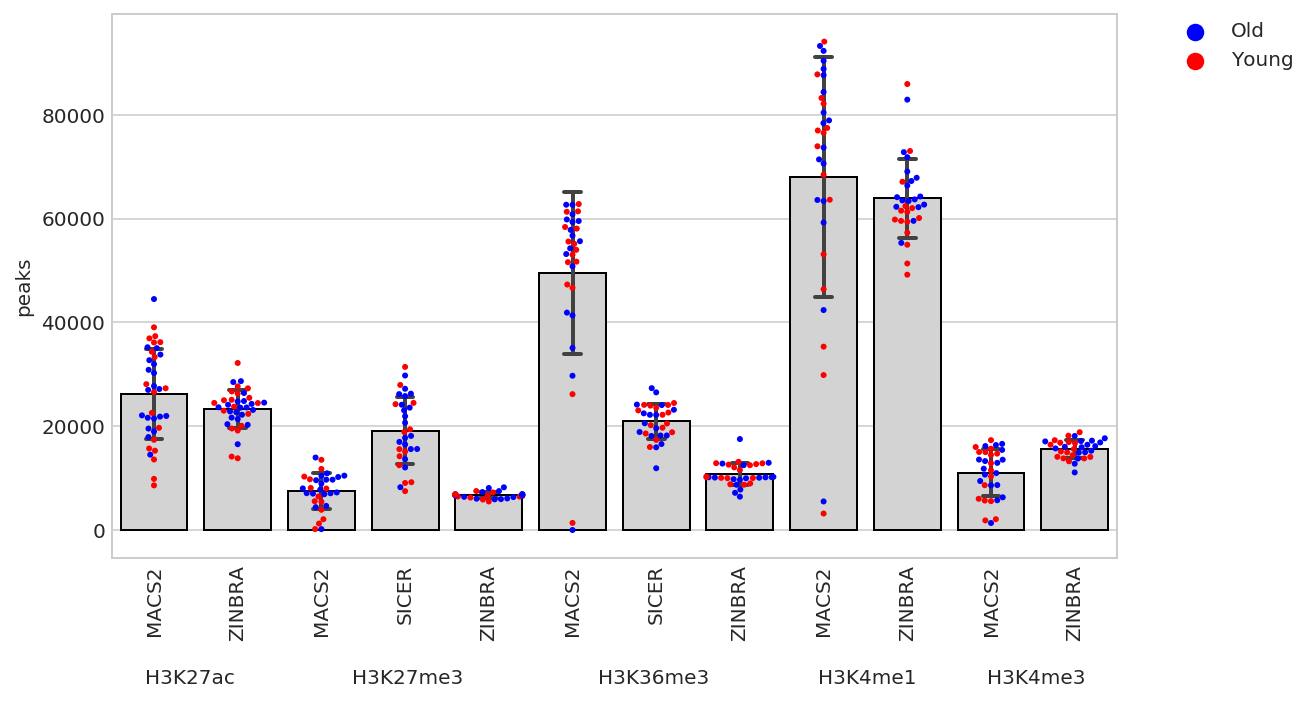

In [192]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict, Counter

age_palette={"Young":"red", "Old": "blue"}
tools_pallete={"MACS2": "lightgray", "SICER": "lightgray", "ZINBRA": "darkgray"}

toshow = OrderedDict([
    ("H3K27ac", [("MACS2", "default"), ("ZINBRA", "tuned")]),
    ("H3K27me3", [("MACS2", "default"), ("SICER", "default"), ("ZINBRA", "tuned")]),
    ("H3K36me3", [("MACS2", "default"), ("SICER", "default"), ("ZINBRA", "tuned")]),
    ("H3K4me1", [("MACS2", "default"), ("ZINBRA", "tuned")]),
    ("H3K4me3", [("MACS2", "default"), ("ZINBRA", "tuned")])
])

dfs = []
xlabels = []
for m, tps in toshow.items():
    for (tool, procedure) in tps:
        xlabels.append(tool)
        dfmtp = df.loc[np.logical_and(df['tool'] == tool, 
                          np.logical_and(df['modification'] == m, 
                                         df['procedure'] == procedure))]
        dfs.append(dfmtp)
dft = pd.concat(dfs, axis=0)
dft['mp'] = dft['modification'] + " " + dft['tool']


dft = dft[['donor', 'peaks', 'mp', 'tool']]
colors = [tools_pallete[tool] for tool in dft['tool']]
dft["age"] = "Young"
dft.loc[dft.donor.str.startswith("OD"), "age"] = "Old"

fig = plt.figure(figsize=(int(len(set(dft['mp'])) * 0.75), 5))
sns.set_style("whitegrid")

ax = sns.barplot(data=dft, 
         x="mp", y="peaks",
         ci="sd", capsize=.2, errwidth=2,
         color="lightgray",
         edgecolor="black")

ax = sns.swarmplot(data=dft, 
      x="mp", y="peaks",
      size=3, #5
      hue = "age",
      palette=age_palette,)


# plt.xticks(rotation=90)
plt.xticks(range(0, len(xlabels)), xlabels, rotation=90)
plt.xlabel('')

fig.text(.15, -.05, 'H3K27ac')
fig.text(.31, -.05, 'H3K27me3')
fig.text(.50, -.05, 'H3K36me3')
fig.text(.67, -.05, 'H3K4me1')
fig.text(.80, -.05, 'H3K4me3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()
plt.close()